In [1]:
import sys
in_colab = 'google.colab' in sys.modules
if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 133kB 2.9MB/s 
     |████████████████████████████████| 614kB 9.2MB/s 
     |████████████████████████████████| 235kB 52.1MB/s 
     |████████████████████████████████| 307kB 55.6MB/s 
     |████████████████████████████████| 51kB 24.7MB/s 
     |████████████████████████████████| 215kB 58.2MB/s 
     |████████████████████████████████| 737kB 50.1MB/s 
     |████████████████████████████████| 51kB 23.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=c764926e7fb18aea15dc71e2ea24b04f35bafba7b88b3c13b41ddafb28d15eb5
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=740a62ef147770838a30fe1b5484d2087aa278ab983bf36244056fda5a694ee4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d

In [2]:
#Fetch smoking data file
from google.colab import files
uploaded = files.upload()

Saving cancerxx - for_import.csv to cancerxx - for_import.csv


In [3]:
# Load smoking data
import pandas as pd
import io
df_smoking = pd.read_csv(io.StringIO(uploaded['cancerxx - for_import.csv'].decode('utf-8')))
df_smoking.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day
0,5,3,2,2.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,3,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.0,NaN,2,NaN,NaN,NaN,1.0,4.0,30.0,1.0,4,3,1,1,1,2,1,2,1,2,2,2,1,2,2,2,2,2,NaN
1,4,0,0,NaN,0,0,NaN,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,3,1,3,1,1.0,20.0,1.0,20.0,2.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,NaN
2,5,5,2,2.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,2,0,0,1,1.0,30.0,2.0,NaN,2.0,NaN,NaN,327.0,NaN,2,NaN,NaN,NaN,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,2,2,2,2,1,2,2,2,2,2,NaN
3,3,1,1,2.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,3,1,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.0,NaN,2,NaN,NaN,NaN,1.0,3.0,30.0,1.0,4,3,1,1,1,2,2,1,1,2,2,1,1,2,2,2,2,2,NaN
4,5,2,2,1.0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,2.0,NaN,2.0,NaN,NaN,307.0,32.0,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1,1,1,1,1,1,2,1,2,2,1,2,2,2,2,2,2,2,10.0


In [4]:
# We assess the contents of df_smoking
df_smoking_shape = df_smoking.shape
print ('df_smoking Shape')
print (df_smoking_shape, '\n')
print ('df_smoking Count')
print (df_smoking.count(), '\n')
print ('df_smoking NaN Count')
print (df_smoking.isna().sum(), '\n')
print ('df_smoking Describe')
print (df_smoking.describe())

df_smoking Shape
(33672, 92) 

df_smoking Count
language                         33672
cereal_serve_per_month           33672
cereal_times_per_month           33672
more_than_one_cereal_type        22858
milk_serve_per_month             33672
milk_times_per_month             33672
milk_type                        24044
soda_serve_per_month             33672
soda_times_per_month             33672
juice_serve_per_month            33672
juice_times_per_month            33672
coffee_serve_per_month           33672
coffee_times_per_month           33672
sports_drink_serve_per_month     33672
sports_drink_times_per_month     33672
fruit_drink_serve_per_month      33672
fruit_drink_times_per_month      33672
fruit_eat_serve_per_month        33672
fruit_eat_times_per_month        33672
salad_eat_serve_per_month        33672
salad_eat_times_per_month        33672
fries_eat_serve_per_month        33672
fries_eat_times_per_month        33672
potatoe_eat_serve_per_month      33672
potatoe_eat_time

In [5]:
# Replace NaN to improve data format
import numpy as np
df_smoking1 = df_smoking.replace ({np.NaN: 0})
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day
0,5,3,2,2.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,3,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,2,0.0,0.0,0.0,1.0,4.0,30.0,1.0,4,3,1,1,1,2,1,2,1,2,2,2,1,2,2,2,2,2,0.0
1,4,0,0,0.0,0,0,0.0,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,3,1,3,1,1.0,20.0,1.0,20.0,2.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,0.0
2,5,5,2,2.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,2,0,0,1,1.0,30.0,2.0,0.0,2.0,0.0,0.0,327.0,0.0,2,0.0,0.0,0.0,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,2,2,2,2,1,2,2,2,2,2,0.0
3,3,1,1,2.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,3,1,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,0.0,2,0.0,0.0,0.0,1.0,3.0,30.0,1.0,4,3,1,1,1,2,2,1,1,2,2,1,1,2,2,2,2,2,0.0
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,2.0,0.0,2.0,0.0,0.0,307.0,32.0,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,1,1,1,1,1,2,1,2,2,1,2,2,2,2,2,2,2,10.0


In [6]:
# Set up boolean columns such that yes = 1 and no = 0
features1 = {'more_than_one_cereal_type', 'vitamin_past_month', 'multivitamin_past_month', 'calcium_past_month', 'vitD_past_month', 'walk_past_wk', 'walk_leisure_past_wk',
            'walkway_existence', 'walkable_retail', 'walkable_bus_stop', 'walkable_entertainment', 'walkable_relaxation', 'streets_have_walkways', 'traffic_discourages_walking',
            'crime_discourages_walking', 'animals_discourage_walking', 'cigarette_even_once', 'cigar_even_once', 'pipe_even_once', 'smokeless_even_once',
            'had_genetic_counseling', 'genetic_counseling_with_MD', 'genetic_counseling_for_cancer'}

replacements1 = {
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0
}

df_smoking2 = df_smoking1[features1].replace(replacements1) 

df_smoking2.head()

,cigarette_even_once,traffic_discourages_walking,walkable_retail,walkable_relaxation,had_genetic_counseling,vitD_past_month,pipe_even_once,vitamin_past_month,streets_have_walkways,walkable_bus_stop,animals_discourage_walking,walk_leisure_past_wk,crime_discourages_walking,walk_past_wk,calcium_past_month,smokeless_even_once,genetic_counseling_for_cancer,walkway_existence,more_than_one_cereal_type,genetic_counseling_with_MD,cigar_even_once,multivitamin_past_month,walkable_entertainment
0,0,1,1,1,0,0.0,0,0,0,1,0,1.0,0,0,0.0,0,0,1,0.0,0,1,0.0,0
1,0,0,1,1,0,0.0,0,1,1,1,0,1.0,0,0,1.0,0,0,1,0.0,0,0,1.0,1
2,0,0,1,1,0,0.0,0,1,1,1,0,1.0,0,0,0.0,0,0,1,0.0,0,1,1.0,1
3,1,1,1,0,0,0.0,0,0,1,1,0,1.0,0,0,0.0,0,0,1,0.0,0,1,0.0,0
4,0,0,1,0,0,0.0,0,1,1,1,1,0.0,0,0,0.0,0,0,1,1.0,0,0,1.0,1


In [7]:
df_smoking1['number'] = df_smoking1.index
df_smoking2['number'] = df_smoking2.index

df_smoking1.loc[df_smoking1.number.isin(df_smoking2.number), features1] = df_smoking2[features1]
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day,number
0,5,3,2,0.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,4.0,30.0,1.0,4,3,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0.0,0
1,4,0,0,0.0,0,0,0.0,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,1,3,1,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0,1
2,5,5,2,0.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0.0,2
3,3,1,1,0.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,0.0,0,0.0,0.0,0.0,1.0,3.0,30.0,1.0,4,3,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0.0,3
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,10.0,4


In [8]:
df_smoking1 = df_smoking1.drop('number', axis = 1)
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day
0,5,3,2,0.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,4.0,30.0,1.0,4,3,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0.0
1,4,0,0,0.0,0,0,0.0,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,3,1,3,1,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0
2,5,5,2,0.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,2,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0.0
3,3,1,1,0.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,3,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,0.0,0,0.0,0.0,0.0,1.0,3.0,30.0,1.0,4,3,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0.0
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,10.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


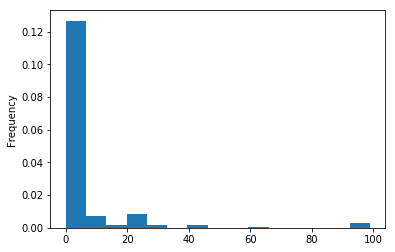

In [9]:
# Freqeuncy plot for cigarettes_per_day
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = df_smoking1['cigarettes_per_day']
plt.hist(df_smoking1['cigarettes_per_day'], normed=True, bins=15)
plt.ylabel('Frequency');

In [10]:
# Drop rows where cigarettes_per_day = 0
df_smoking1['cigarettes_per_day'] =  df_smoking1['cigarettes_per_day'].replace ({np.NaN: 0})
df_smoking1 = df_smoking1[df_smoking1['cigarettes_per_day'] > 0]
df_smoking1.shape

(7602, 92)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


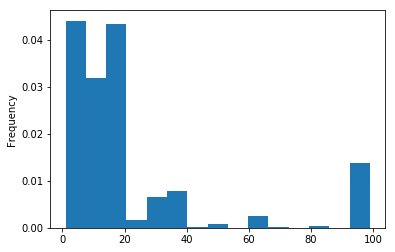

In [11]:
# Create frequency plot of cigarettes per day
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = df_smoking1['cigarettes_per_day']
plt.hist(df_smoking1['cigarettes_per_day'], normed=True, bins=15)
plt.ylabel('Frequency');

In [12]:
# Create a column in which cigarettes per day are sorted into 8 bins
df_smoking1['cigarettes_per_day_bins'] = pd.cut(x=df_smoking1['cigarettes_per_day'], bins=[0, 10, 20, 100], labels=[1, 2, 3])
df_smoking1 = df_smoking1.drop('cigarettes_per_day', axis = 1)
df_smoking1['cigarettes_per_day_bins'] =  df_smoking1['cigarettes_per_day_bins'].replace ({np.NaN: 0})
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day_bins
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1
9,1,3,2,0.0,1,1,1.0,3,3,0,0,1,1,0,0,4,2,2,2,0,0,1,3,1,2,5,2,0,0,2,2,1,3,1,3,2,2,2,2,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1
11,5,0,0,0.0,0,0,0.0,1,2,0,0,1,1,0,0,2,2,2,3,1,2,1,2,1,2,1,2,0,0,3,2,0,0,0,0,1,3,2,3,2,...,3,1,3,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,1
13,5,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,3,0,0,0,0,20,3,4,3,3,3,2,1,5,3,0,0,0,0,2,3,20,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,30.0,4.0,0.0,0.0,1,5.0,40.0,1.0,1.0,3.0,90.0,1.0,1,3,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1
14,2,0,0,0.0,0,0,0.0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,2,1,2,2,2,4,1,1,1,0,0,0,0,1,2,3,2,15,...,1,1,2,1,1.0,30.0,1.0,30.0,1.0,30.0,2.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [13]:
# Feature Engineering

# walk_leisure_distance_week = walking_leisure_distance * walk_number_week
df_smoking1['walk_leisure_distance_week'] = df_smoking1['walk_leisure_ distance']*df_smoking1['walk_number_wk']

# single_walk_distance_week = single_walk_distance * walk_number_week
df_smoking1['single_walk_distance_week'] = df_smoking1['single_walk_distance']*df_smoking1['walk_number_wk']

# tobacco_even_once = cigarette_even_once + cigar_even_once + smokeless_even_once
df_smoking1['tobacco_even_once'] = df_smoking1['cigarette_even_once'] + df_smoking1['cigar_even_once'] + df_smoking1['smokeless_even_once']

# red_meat_eat_serve_per_time = red_meat_eat_serve_month / red_meat_eat_times_month
df_smoking1['red_meat_eat_serve_per_time'] = df_smoking1['red_meat_eat_serve_per_month']/df_smoking1['red_meat_eat_times_per_month']

# bread_eat_serve_per_time = bread_eat_serve_month / bread_eat_times_month
df_smoking1['bread_eat_serve_per_time'] = df_smoking1['bread_eat_serve_per_month']/df_smoking1['bread_eat_times_per_month']

df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day_bins,walk_leisure_distance_week,single_walk_distance_week,tobacco_even_once,red_meat_eat_serve_per_time,bread_eat_serve_per_time
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0,0.500000,1.0
9,1,3,2,0.0,1,1,1.0,3,3,0,0,1,1,0,0,4,2,2,2,0,0,1,3,1,2,5,2,0,0,2,2,1,3,1,3,2,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0.0,0.0,0,1.000000,NaN
11,5,0,0,0.0,0,0,0.0,1,2,0,0,1,1,0,0,2,2,2,3,1,2,1,2,1,2,1,2,0,0,3,2,0,0,0,0,1,3,2,3,2,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0.0,0.0,1,1.000000,0.5
13,5,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,3,0,0,0,0,20,3,4,3,3,3,2,1,5,3,0,0,0,0,2,3,20,...,0.0,0.0,0.0,1.0,30.0,4.0,0.0,0.0,1,5.0,40.0,1.0,1.0,3.0,90.0,1.0,1,3,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,450.0,200.0,1,6.666667,NaN
14,2,0,0,0.0,0,0,0.0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,2,1,2,2,2,4,1,1,1,0,0,0,0,1,2,3,2,15,...,30.0,1.0,30.0,1.0,30.0,2.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0,5.000000,1.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

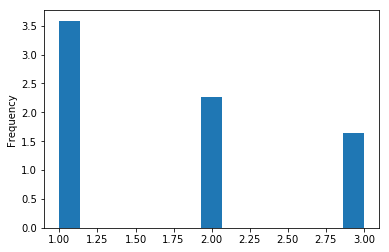

In [14]:
# Looking at the frequency distribution of cigarettes per day bins
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_bin = df_smoking1['cigarettes_per_day_bins']
plt.hist(d_bin, normed=True, bins=15)
plt.ylabel('Frequency')

In [15]:
# Train/validate split: random 80/20% train/validate split.
from sklearn.model_selection import train_test_split
XTrain, XVal, yTrain, yVal = train_test_split(df_smoking1.drop('cigarettes_per_day_bins', axis = 1), df_smoking1['cigarettes_per_day_bins'], test_size = 0.2, random_state = 42)

XTrain.shape, yTrain.shape, XVal.shape, yVal.shape

((6081, 96), (6081,), (1521, 96), (1521,))

In [16]:
# Look at correlation coefficients
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
XTrain.corr()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,red_meat_eat_times_per_month,processed_meat_eat_serve_per_month,processed_meat_eat_times_per_month,bread_eat_serve_per_month,bread_eat_times_per_month,candy_eat_serve_per_month,candy_eat_times_per_month,donut_eat_serve_per_month,donut_eat_times_per_month,cookie_eat_serve_per_month,cookie_eat_times_per_month,ice_cream_eat_serve_per_month,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,walk_leisure_distance_week,single_walk_distance_week,tobacco_even_once,red_meat_eat_serve_per_time,bread_eat_serve_per_time
language,1.000000,0.436982,0.351576,-0.035361,0.433675,0.349838,-0.096036,0.431958,0.342304,0.428804,0.332304,0.426747,0.333119,0.432197,0.359200,0.431355,0.358626,0.425964,0.384347,0.427673,0.382662,0.425416,0.361141,0.422435,0.375218,0.421520,0.334060,0.422670,0.352108,0.415677,0.359752,0.421930,0.332938,0.422585,0.358019,0.418889,0.360487,0.417031,0.363737,0.419657,0.376608,0.418972,0.373554,0.417267,0.339279,0.411998,0.372756,0.416284,0.334741,0.409480,0.355908,0.414443,0.350857,0.415217,0.354492,-0.050629,-0.037872,-0.029406,-0.040267,-0.034379,-0.016192,-0.013972,-0.011984,-0.066491,-0.021112,-0.100718,-0.049873,-0.015167,-0.075258,-0.077325,-0.026543,-0.026035,-0.061651,0.322965,0.214795,-0.203418,-0.159764,-0.188837,-0.150265,-0.141028,-0.188904,-0.093775,-0.096958,-0.069518,-0.014661,0.017100,0.021861,0.036964,-0.011091,-0.021622,-0.015048,-0.020607,-0.009937,0.019907,0.428273,0.448476
cereal_serve_per_month,0.436982,1.000000,0.760684,-0.138573,0.972695,0.769347,-0.232121,0.959336,0.734191,0.956040,0.727421,0.951691,0.801064,0.957457,0.808602,0.952001,0.798001,0.957833,0.806646,0.950363,0.789765,0.950622,0.706499,0.936681,0.743602,0.935026,0.704172,0.940141,0.698946,0.928090,0.801514,0.932706,0.678452,0.938145,0.679303,0.930008,0.700663,0.926477,0.769202,0.929806,0.780559,0.928255,0.707912,0.923150,0.735331,0.922073,0.707072,0.926723,0.680731,0.912101,0.682247,0.918537,0.677407,0.921843,0.669004,-0.243404,-0.162842,-0.150437,-0.096730,-0.086469,-0.122617,-0.111407,-0.099275,-0.213615,-0.118378,-0.114823,-0.039521,-0.034909,-0.097345,-0.188538,-0.105001,-0.067584,-0.163052,0.612504,0.481079,-0.385381,-0.199678,-0.181334,-0.176244,-0.274859,-0.217642,-0.097254,-0.06925

In [17]:
# Dropping highly corrlated columns
def correlation(dataset, validation_dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    del validation_dataset[colname] # deleting the column from the validation dataset
    
correlation(XTrain, XVal, 0.98)

XTrain.shape
XVal.shape

(1521, 81)

In [18]:
# Begin with baselines for classification. 
# The baseline accuracy, if the majority class is guessed for every prediction?
# option with pandas function:
yTrain.value_counts(normalize=True)

1    0.475086
2    0.305542
3    0.219372
Name: cigarettes_per_day_bins, dtype: float64

In [19]:
# option with scikit-learn function
from sklearn.metrics import accuracy_score
y = yTrain
majority_class = y.mode()[0]
y_pred = [majority_class] * len(y)
accuracy_score(y, y_pred)

0.4750863344844598

In [0]:
# Thus, baseline accuracy, if you guessed the majority class for every prediction is 0.286

In [0]:
# Optimizing Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define classifier
forest = RandomForestClassifier(random_state = 1)

# Input
X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

# Parameters to fit
n_estimators = [5, 10, 45, 46, 152, 205, 358, 393, 1000]
max_depth = [3, 5, 7, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 5, 10, 15]
max_leaf_nodes = [None, 10, 52]
max_features = [0.11373956383989692, 0.14621091571560108, 0.17046743865886782, 0.17281968473284381, 0.5545636480509806, 0.6130788778718701, 0.6216883421110927, 0.6843610478580876, 0.840823]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             max_leaf_nodes = max_leaf_nodes,
             max_features = max_features)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 10,
                     scoring='accuracy', return_train_score=True,
                     n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

In [0]:
# Output best accuracy and best parameters
print('The score achieved with the best parameters = ', gridF.best_score_, '\n')
print('The parameters are:', gridF.best_params_)

In [21]:
# Use a scikit-learn pipeline to encode categoricals and fit a Random Forest Classifier model.

X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                                   max_features = 0.11373956383989692,
                                   max_leaf_nodes = None,
                                   min_samples_leaf = 1,
                                   min_samples_split = 10,
                                   n_estimators = 205))
pipeline.fit(X_train, y_train)

# Get the model's validation accuracy
ce.OneHotEncoder(use_cat_names=True),
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5364891518737672


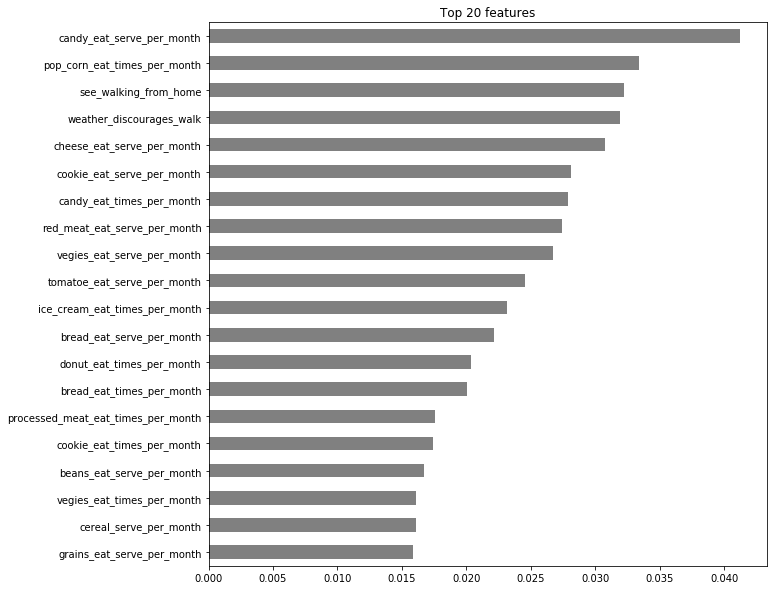

In [22]:
# Plot of features
%matplotlib inline
import matplotlib.pyplot as plt
# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
rf = pipeline.named_steps['randomforestclassifier']
importances1 = pd.Series(rf.feature_importances_, encoded.columns)
# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh(color='grey');

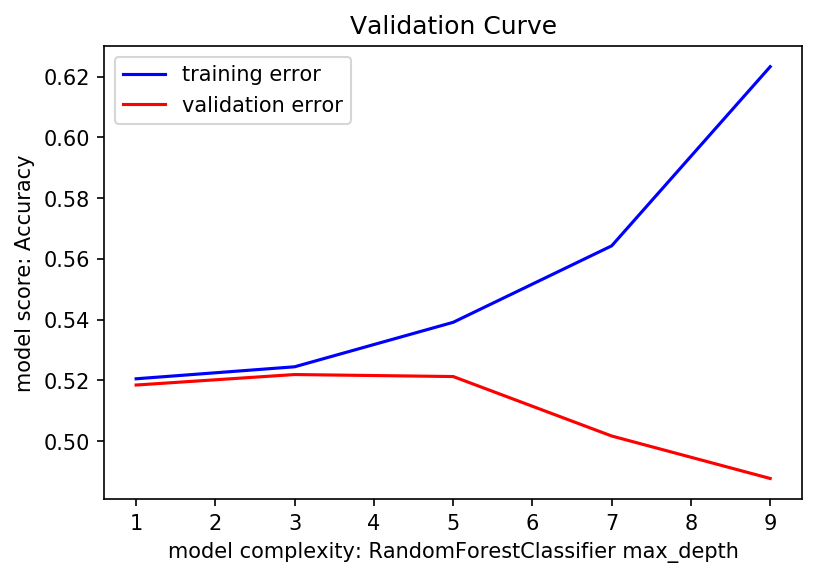

In [23]:
# Generate validation curves
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()
)

depth = range(1, 10, 2)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeclassifier__max_depth',
    param_range=depth, scoring='accuracy',
    cv=3,
    n_jobs=-1
)
    
plt.figure(dpi=150)
plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: RandomForestClassifier max_depth')
plt.ylabel('model score: Accuracy')
plt.legend();

In [24]:
# Tuning the hyper-parameters for a Random Forrest Classifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

param_distributions = {'simpleimputer__strategy': ['mean', 'median', 'most_frequent']}
search = RandomizedSearchCV( pipeline, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', verbose=10, return_train_score=True, n_jobs=-1)

search.fit(X_train, y_train);

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    8.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   10.0s finished


In [25]:
from sklearn.model_selection import cross_val_score
k = 3
scores = cross_val_score(pipeline, X_val, y_val, cv=k, 
scoring='accuracy')
print(f'Validation Accuracy for {k} folds:', scores);

Validation Accuracy for 3 folds: [0.54330709 0.53846154 0.53952569]


In [26]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean'}
Cross-validation Accuracy 0.5293537247163296


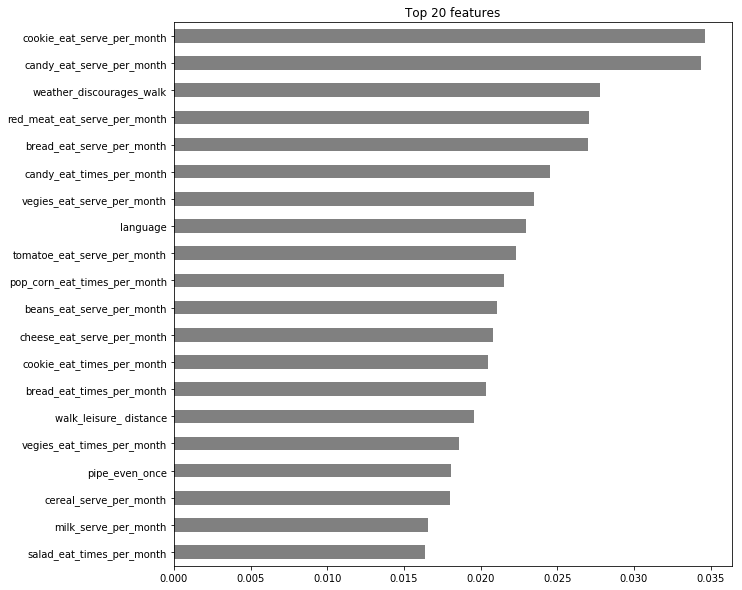

In [27]:
pipeline.fit(X_val, y_val)
# Plot of features
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_val)
rf = pipeline.named_steps['randomforestclassifier']
importances2 = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances2.sort_values()[-n:].plot.barh(color='grey');

In [28]:
# Demonstrate the relatively high cardinatlity of candy_eat_times_per_month 

XTrain['cookie_eat_serve_per_month'].value_counts()

1      1730
0      1502
2      1138
3       507
4       265
998     254
5       185
10      120
15       62
7        58
6        57
20       45
8        33
997      32
30       23
999      20
12       17
25       14
18        5
14        4
9         3
203       1
13        1
28        1
24        1
22        1
16        1
31        1
Name: cookie_eat_serve_per_month, dtype: int64

In [29]:
# Get drop-column importances
column = 'cookie_eat_serve_per_month'

# # Fit without column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without cookie_eat_serve_per_month: 0.5325443786982249
Validation Accuracy with cookie_eat_serve_per_month: 0.5364891518737672
Drop-Column Importance for cookie_eat_serve_per_month: 0.0039447731755423154


In [30]:
# Rerun the permutation importance process, but for a different feature
feature = 'language'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy without {feature} permuted: {score_permuted}')
print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy without language permuted: 0.5351742274819198
Validation Accuracy with language: 0.5364891518737672
Permutation Importance: 0.0013149243918474385


In [31]:
# Using Eli5 library which does not work with pipelines
transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)

model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.11373956383989692,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=205, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [32]:
# Get permutation importances
! pip install eli5
from eli5.sklearn import PermutationImportance
import eli5

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=2,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

     |████████████████████████████████| 112kB 2.8MB/s 


Using TensorFlow backend.


Weight,Feature
0.0026 ± 0.0013,multivitamin_days_in_month
0.0026 ± 0.0000,tomatoe_eat_serve_per_month
0.0023 ± 0.0007,sports_drink_times_per_month
0.0020 ± 0.0000,vitD_days_in_month
0.0020 ± 0.0013,salad_eat_times_per_month
0.0016 ± 0.0007,cigarette_even_once
0.0016 ± 0.0007,red_meat_eat_serve_per_month
0.0016 ± 0.0007,see_walking_from_home
0.0016 ± 0.0020,walk_number_wk
0.0013 ± 0.0013,bread_eat_serve_per_month


In [33]:
# Thus, language is way more important according to feature permutation than according to feature importance in the Random Forrest model
# Use importances for feature selection
print('Shape before removing features:', X_train.shape)

Shape before removing features: (6081, 81)


In [34]:
# Remove features of 0 importance
zero_importance = 0.0003
mask = permuter.feature_importances_ > zero_importance
features = X_train.columns[mask]
X_train = X_train[features]
print('Shape after removing features:', X_train.shape)

Shape after removing features: (6081, 32)


In [35]:
# Random Forest with reduced features to 32
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5384615384615384


In [0]:
# Validation Accuracy History
# 0.4750863344844598 – baseline guessing the majority class
# 0.5364891518737672 - use pipeline with random forest
# 0.5293537247163296 – from cross validation
# 0.5364891518737672 – doing permutation importance
# 0.5384615384615384 – after removing features of zero importance (improvement over baseline = 13.3%)

In [37]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state = 42, max_depth = 10,
                           max_features = 0.11373956383989692,
                           max_leaf_nodes = None,
                           min_samples_leaf = 1,
                           min_samples_split = 10,
                           n_estimators = 205)

rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(9), scoring='accuracy', verbose = 10)
rfecv.fit(X_train, y_train)

Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 feature

RFECV(cv=StratifiedKFold(n_splits=9, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=10,
                                       max_features=0.11373956383989692,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=10,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=205, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=10)

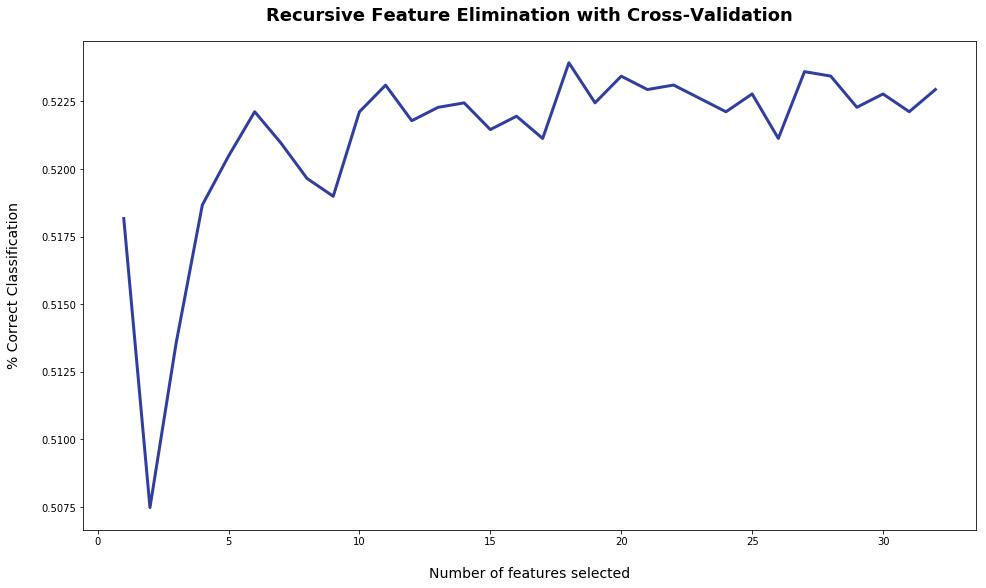

In [38]:
#Plot the results of RFE
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [39]:
# Print the optimal number of features and accuracy after RFE
print('Optimal number of features: {}'.format(rfecv.n_features_))

y_pred = rfecv.predict(X_val)
print ('Accuracy = ', accuracy_score(y_val, y_pred))

Optimal number of features: 18
Accuracy =  0.5325443786982249


In [40]:
# Drop unimportant features 
print(np.where(rfecv.support_ == False)[0])

X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_val.drop(X_val.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

X_val.shape

[ 0 15 16 17 18 19 20 21 22 23 26 28 29 30]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1521, 18)

In [41]:
X_train.shape

(6081, 18)

In [42]:
#Fit to RFECV data set to confirm the best accuracy score

pipeline0 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

# Fit on train, score on val
pipeline0.fit(X_train, y_train)
print('Validation Accuracy', pipeline0.score(X_val, y_val))

Validation Accuracy 0.5325443786982249


In [0]:
# Seeing if feature scaling will improve accuracy
from sklearn.preprocessing import MinMaxScaler
 
# Get the numbers for the items to be removed from features above
reduced_features = features.delete([0, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 28, 29, 30])

min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[reduced_features])
X_val_minmax=min_max.fit_transform(X_val[reduced_features])

In [45]:
#Fit to the scaled data set

pipeline1 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

# Fit on train, score on val
pipeline1.fit(X_train_minmax, y_train)
print('Validation Accuracy', pipeline1.score(X_val_minmax, y_val))

Validation Accuracy 0.5338593030900723


In [0]:
# Since scaling does not improve the accuracy score, it is not implemented.

In [0]:
# Seeing if feature standardization will improve accuracy
from sklearn.preprocessing import scale

X_train_scale=scale(X_train[reduced_features])
X_val_scale=scale(X_val[reduced_features])

In [48]:
#Fit to the standardized data set

pipeline2 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

# Fit on train, score on val
pipeline2.fit(X_train_scale, y_train)
print('Validation Accuracy', pipeline2.score(X_val_scale, y_val))

Validation Accuracy 0.5318869165023011


In [0]:
# Since standardizing does not improve the accuracy score, it is not implemented.

In [50]:
# Gradient boosting using XGboost
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((6081, 18), (1521, 18), (6081, 18), (1521, 18))

In [51]:
#XGboost with learning_rate=0.25
from xgboost import XGBClassifier

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model = XGBClassifier(          
    random_state = 42, 
    max_depth = 10,
    max_features = 0.11373956383989692,
    max_leaf_nodes = None,
    min_samples_leaf = 1,
    min_samples_split = 10,
    n_estimators = 205,
    learning_rate=0.25,
    n_jobs=-1
)

model.fit(X_train_encoded, y_train, eval_set=eval_set, eval_metric='merror',
    early_stopping_rounds=50)

[0]	validation_0-merror:0.361947	validation_1-merror:0.495069
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.345009	validation_1-merror:0.485207
[2]	validation_0-merror:0.327578	validation_1-merror:0.482577
[3]	validation_0-merror:0.322315	validation_1-merror:0.474688
[4]	validation_0-merror:0.299622	validation_1-merror:0.480605
[5]	validation_0-merror:0.284822	validation_1-merror:0.474688
[6]	validation_0-merror:0.268048	validation_1-merror:0.477318
[7]	validation_0-merror:0.260648	validation_1-merror:0.47929
[8]	validation_0-merror:0.24075	validation_1-merror:0.474688
[9]	validation_0-merror:0.229239	validation_1-merror:0.479947
[10]	validation_0-merror:0.215918	validation_1-merror:0.483235
[11]	validation_0-merror:0.206545	validation_1-merror:0.485865
[12]	validation_0-merror:0.1975	validation_1-merror:0.483892
[13]	validation_0-merror:0.18911

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              max_features=0.11373956383989692, max_leaf_nodes=None,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=10,
              missing=None, n_estimators=205, n_jobs=-1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

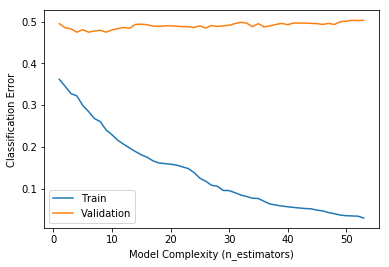

In [52]:
# Plot the results
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.5, 0.7)) # Zoom in
plt.legend();

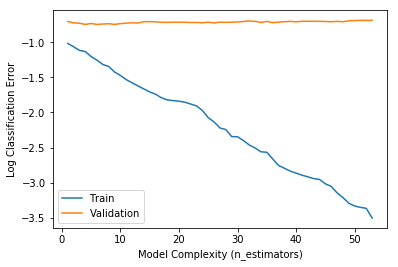

In [53]:
# Plot log classification error versus model complexity
import numpy as np
results = model.evals_result()
log_train_error = np.log(results['validation_0']['merror'])
log_val_error = np.log(results['validation_1']['merror'])
epoch = range(1, len(train_error)+1)
plt.plot(epoch, log_train_error, label='Train')
plt.plot(epoch, log_val_error, label='Validation')
plt.ylabel('Log Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((-0.75, -0.4)) # Zoom in
plt.legend();

In [54]:
# Note the Classification Error is minimum at n_estimators = 6 in the above
# This is best scene when using the Zoom In scaling

#Gradient Boosting R^2
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=46, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.14653197858845546


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [76]:
# Getting the value distribution for the language feature
df_smoking1['sports_drink_times_per_month'].value_counts()

0    5693
3     706
2     600
8     302
1     255
7      36
9      10
Name: sports_drink_times_per_month, dtype: int64

In [0]:
# Define function to vary the sports_drink_times_per_month feature while holding all other features constant
import numpy as np

def vary_sports_drink_times_per_month(model, example):
    print('Vary sports_drink_times_per_month, hold other features constant', '\n')
    example = example.copy()
    preds = []
    for sports in range(0,7, 1):
        example['sports_drink_times_per_month'] = sports
        pred = model.predict(example)[0]
        print(f'Predicted cigarettes_per_day_bin: {pred:.3f}%')
        print(example.to_string(), '\n')
        preds.append(pred)
    print('Difference between predictions')
    print(np.diff(preds))

In [81]:
# Vary the sports_drink_times_per_month feature while holding all other features constant for the first row
example1 = X_val.iloc[[0]]
vary_sports_drink_times_per_month(gb, example1)

Vary sports_drink_times_per_month, hold other features constant 

Predicted cigarettes_per_day_bin: 1.727%
       milk_serve_per_month  milk_times_per_month  soda_serve_per_month  soda_times_per_month  sports_drink_times_per_month  salad_eat_times_per_month  beans_eat_serve_per_month  grains_eat_serve_per_month  vegies_eat_serve_per_month  tomatoe_eat_serve_per_month  red_meat_eat_serve_per_month  red_meat_eat_times_per_month  bread_eat_serve_per_month  candy_eat_times_per_month  walk_leisure_ distance  see_walking_from_home  walkable_bus_stop  single_walk_distance_week
31502                     3                     2                     0                     0                             0                          2                          2                           0                           1                            2                             3                             2                          4                          2                     0.0                      2

In [83]:
# Vary the sports_drink_times_per_month feature while holding all other features constant for the second row
example2 = X_val.iloc[[2]]
vary_sports_drink_times_per_month(gb, example2)

Vary sports_drink_times_per_month, hold other features constant 

Predicted cigarettes_per_day_bin: 1.759%
       milk_serve_per_month  milk_times_per_month  soda_serve_per_month  soda_times_per_month  sports_drink_times_per_month  salad_eat_times_per_month  beans_eat_serve_per_month  grains_eat_serve_per_month  vegies_eat_serve_per_month  tomatoe_eat_serve_per_month  red_meat_eat_serve_per_month  red_meat_eat_times_per_month  bread_eat_serve_per_month  candy_eat_times_per_month  walk_leisure_ distance  see_walking_from_home  walkable_bus_stop  single_walk_distance_week
27082                     2                     2                     0                     0                             0                          2                          2                           0                           1                            0                             2                             3                          0                          1                     0.0                      2

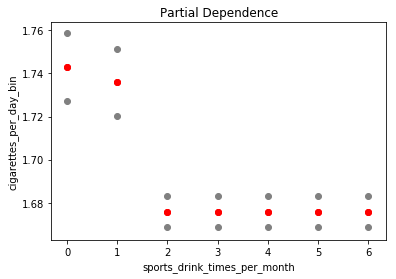

In [86]:
# Plot pair dependency of the sports_drink_times_per_month feature for rows 1 and 2 
%matplotlib inline
import matplotlib.pyplot as plt

examples = pd.concat([example1, example2])
for sports in range(0, 7, 1):
    examples['sports_drink_times_per_month'] = sports
    preds = gb.predict(examples)
    for pred in preds:
        plt.scatter(sports, pred, color='grey')
        plt.scatter(sports, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('sports_drink_times_per_month')
    plt.ylabel('cigarettes_per_day_bin')

     |████████████████████████████████| 57.7MB 4.8MB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=57cccfa83ce1ab94688de1c50f225039f2ff0138b74ce0e5f80e80d755b13d5e
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built PDPbox


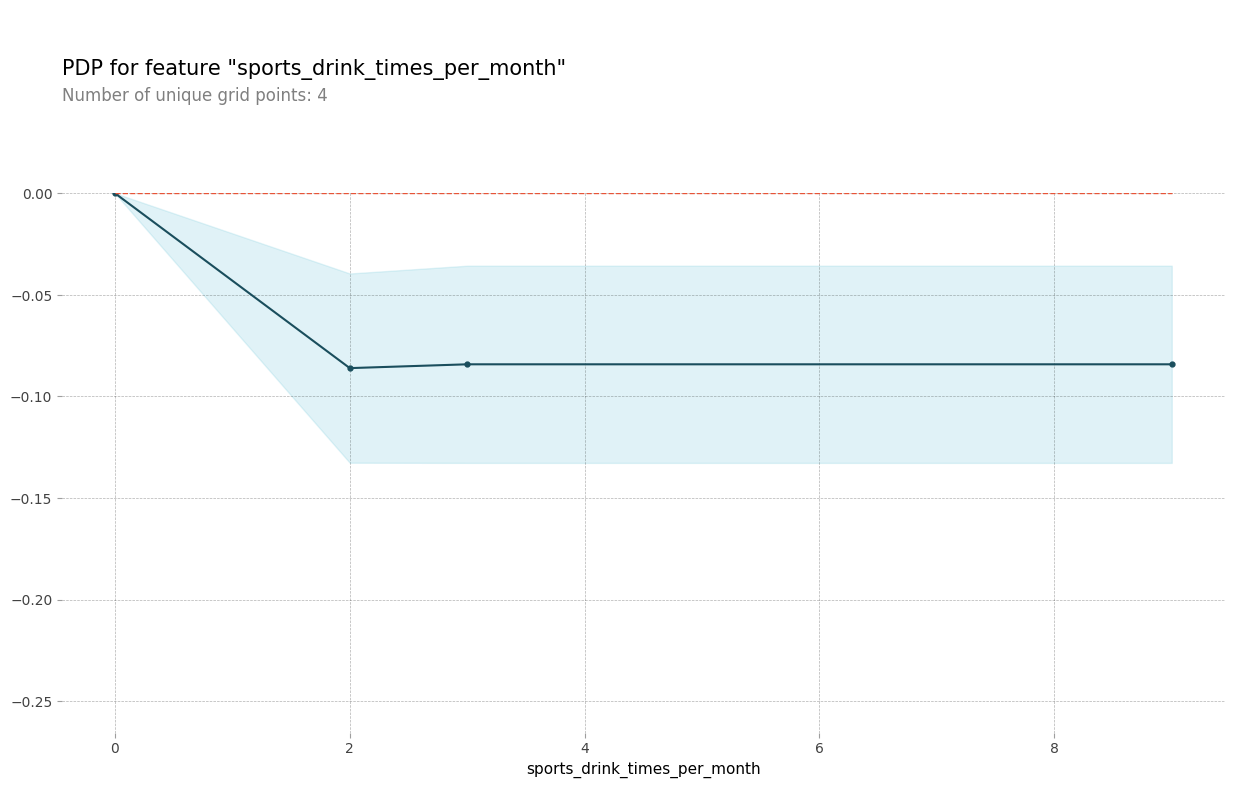

In [87]:
# Create patrial dependence plots with one feature
import matplotlib.pyplot as plt
! pip install PDPbox

# First for the sports_drink_times_per_month feature
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'sports_drink_times_per_month'
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

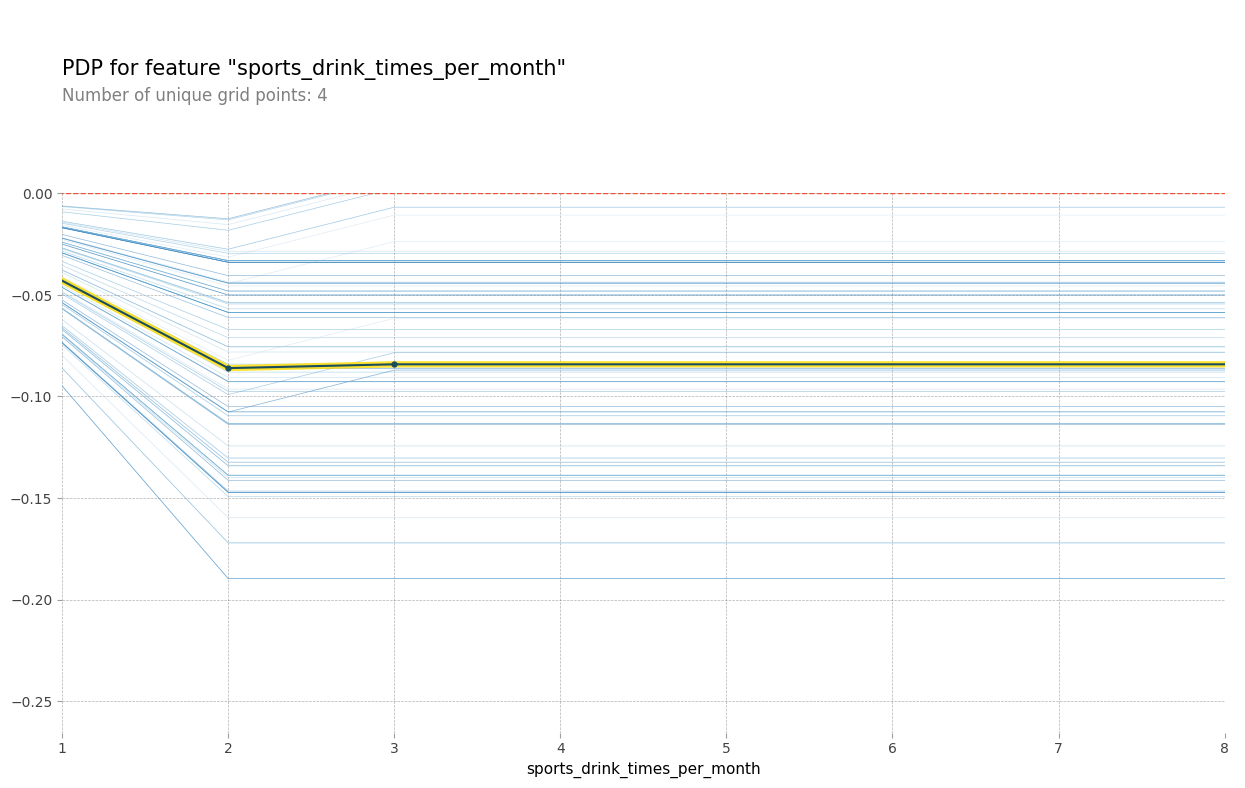

In [88]:
# Plot partial dependence plot with ICE lines for the language feature
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(1,8);

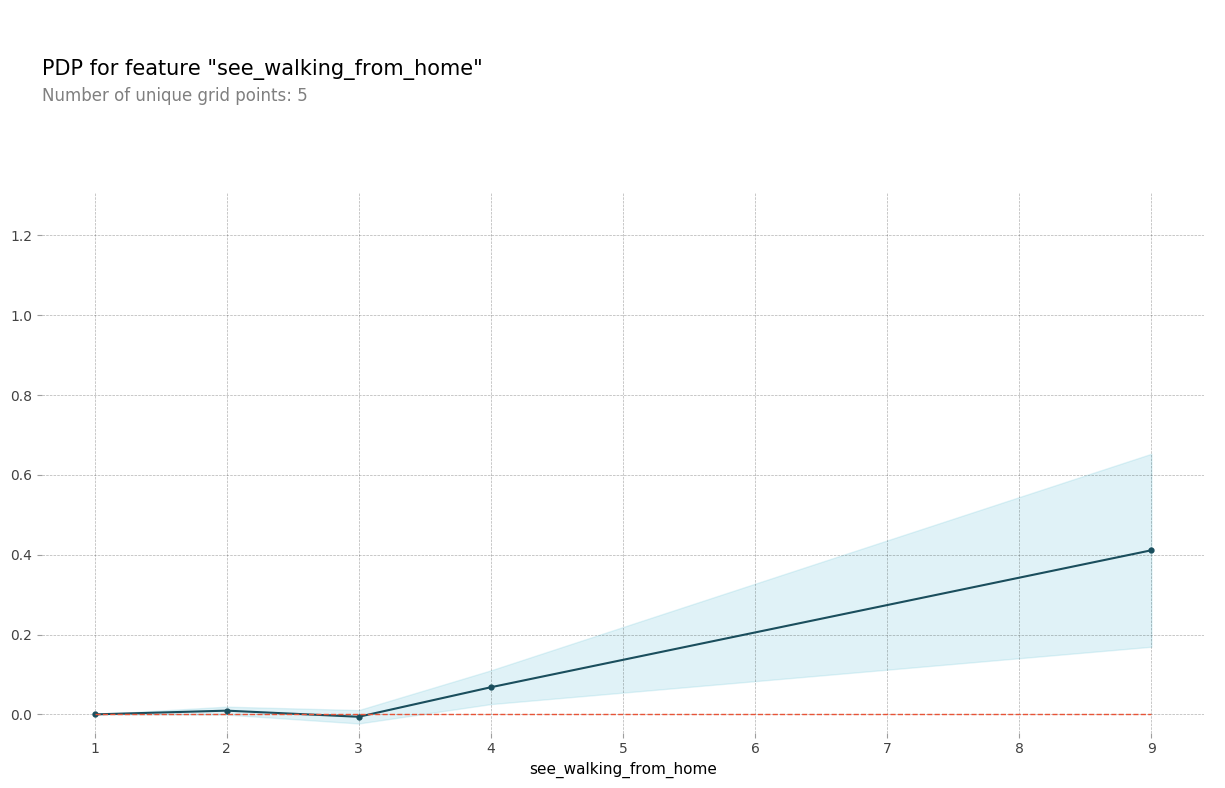

In [89]:
# First for the see_walking_from_home feature
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'see_walking_from_home'
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

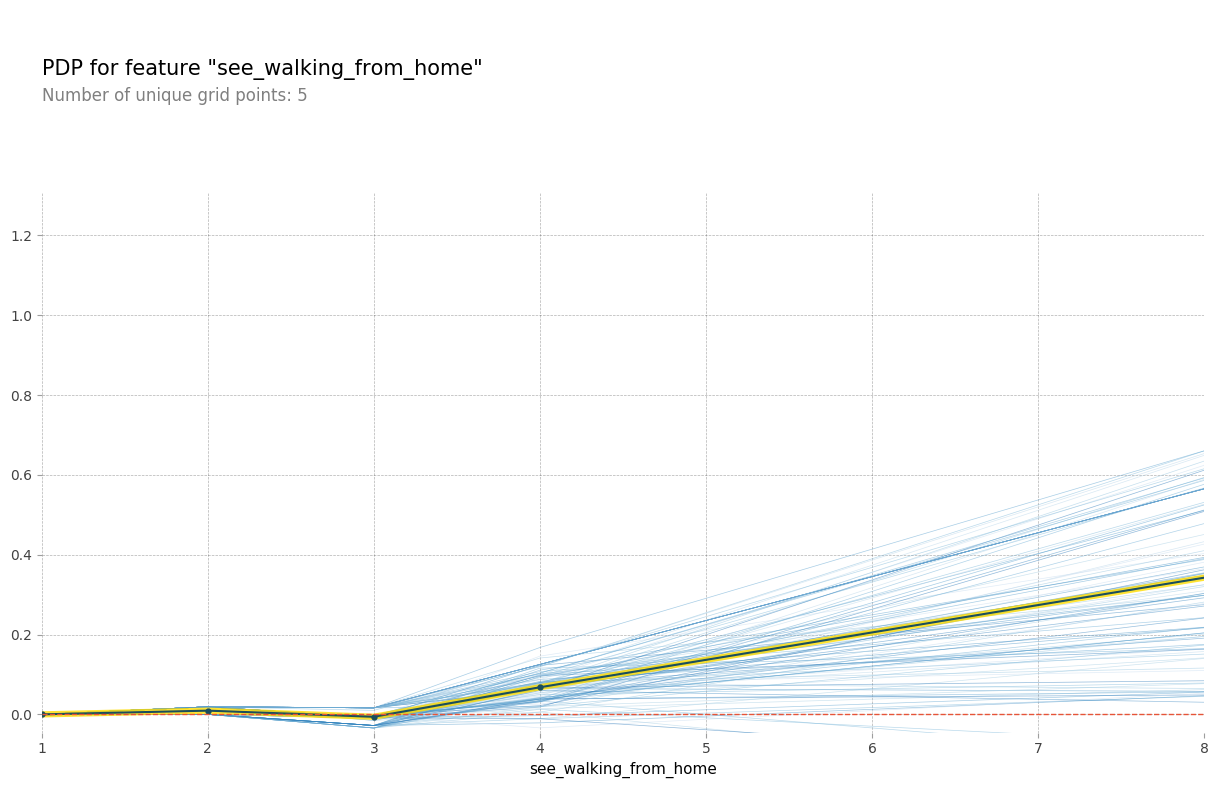

In [90]:
# Plot partial dependence plot with ICE lines for the see_walking_from_home feature
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(1,8);

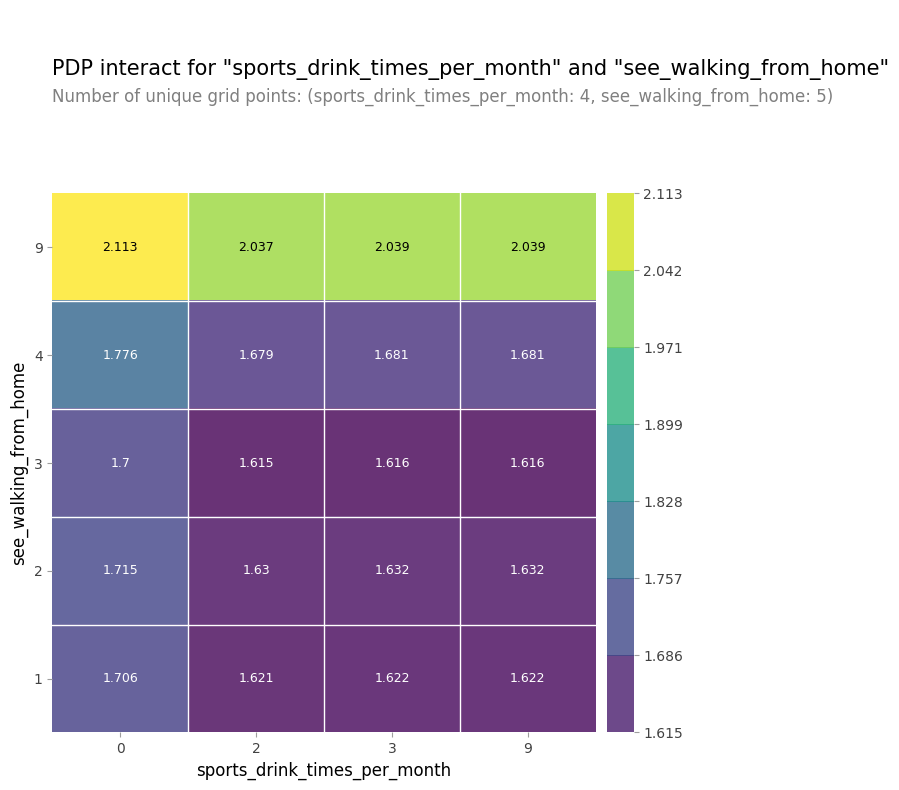

In [91]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['sports_drink_times_per_month', 'see_walking_from_home']
interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [92]:
# A two feature partical dependence plot in 3D
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

import plotly.graph_objs as go

target = 'cigarettes_per_day_bins'

surface = go.Surface(x=pdp.columns,
                     y=pdp.index,
                     z=pdp.values)

layout = go.Layout(
    scene=dict(
    xaxis=dict(title=features[0]),
    yaxis=dict(title=features[1]),
    zaxis=dict(title=target)
    )
)
fig = go.Figure(surface, layout)
fig.show()

In [0]:
# Test ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import category_encoders as ce

processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean')
)

# Note ROC AUC ranges from 0 - 1, the higher the better
X_val_processed = processor.fit_transform(X_val)

In [94]:
# Contributrions to making bin 1 (1 - 10 cigarettes per day) for sample 170
! pip install shap==0.23.0
! pip install -I shap

import shap

row = X_val.iloc[[170]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values_input = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_input[0],
    features=row
)

     |████████████████████████████████| 184kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.23.0-cp36-cp36m-linux_x86_64.whl size=235671 sha256=874e44fc754bfc205be562add17789cfc11b6ff545c1f38f458e86c0dd44788d
  Stored in directory: /root/.cache/pip/wheels/c1/2c/aa/10d1782fe066536fcd564a2f8adea4dd05f57768236038855b
Successfully built shap
     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 20.0MB 49.1MB/s 
     |████████████████████████████████| 25.2MB 1.2MB/s 
     |████████████████████████████████| 6.7MB 31.9MB/s 
     |████████████████████████████████| 10.4MB 39.3MB/s 
     |████████████████████████████████| 61kB 25.3MB/s 
     |████████████████████████████████| 296kB 52.2MB/s 
     |████████████████████████████████| 235kB 59.0MB/s 
     |████████████████████████████████| 512kB 47.0MB/s 
  Created wheel for shap: filename=shap-0.31.0-cp36-cp36m-linux_x86_64.whl size=375012 sha256=4a9a848bbe8b843c10b4ed8ab8558ceff9fd08cb32f96c5cbf5192099

In [98]:
# Contributrions to making bin 3 (21 - more cigarettes per day) for sample 170
import shap

row = X_val.iloc[[170]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values_input = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[2],
    shap_values=shap_values_input[2],
    features=row
)

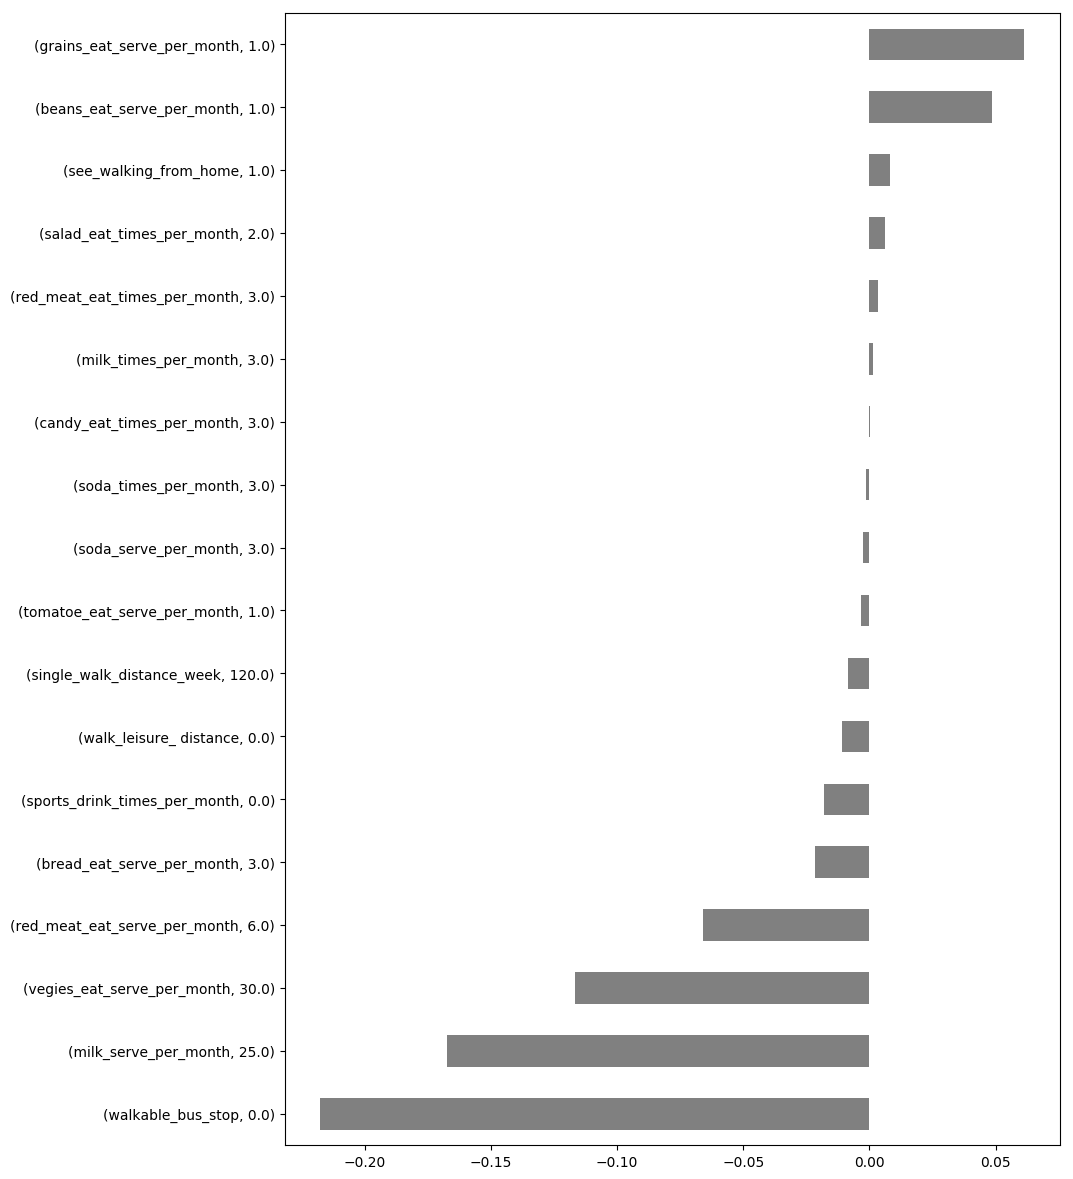

In [99]:
# Featues importances for sample 170

feature_names = row.columns
feature_values = row.values[0]
shap_values_array = np.asarray(shap_values_input)
shaps = pd.Series(shap_values_array[0,0,:], zip(feature_names, feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(10,15));

In [101]:
# Create a dataframe for sample 170
# bin versus feature

my_python_list = [shap_values_array[0, 0, :], shap_values_array[1, 0, :], shap_values_array[2, 0, :]]
df_bins = pd.DataFrame(columns=np.array(feature_names), data=my_python_list)

df_bins.head(8)

,milk_serve_per_month,milk_times_per_month,soda_serve_per_month,soda_times_per_month,sports_drink_times_per_month,salad_eat_times_per_month,beans_eat_serve_per_month,grains_eat_serve_per_month,vegies_eat_serve_per_month,tomatoe_eat_serve_per_month,red_meat_eat_serve_per_month,red_meat_eat_times_per_month,bread_eat_serve_per_month,candy_eat_times_per_month,walk_leisure_ distance,see_walking_from_home,walkable_bus_stop,single_walk_distance_week
0,-0.167293,0.001286,-0.002567,-0.001347,-0.018152,0.006047,0.048797,0.061489,-0.116583,-0.003481,-0.066052,0.003504,-0.021571,0.000278,-0.011010,0.008335,-0.217838,-0.008346
1,0.077094,-0.010515,-0.021258,-0.030788,0.001454,0.003261,0.003320,0.022720,0.123730,0.006968,0.089924,0.000837,0.012246,0.012774,-0.042231,0.007748,0.177480,0.180525
2,-0.012663,-0.023291,-0.029211,-0.000594,-0.021030,-0.001252,-0.038553,-0.028939,0.031745,0.000677,0.009474,-0.000685,-0.000028,-0.008315,0.013490,-0.077183,0.006289,-0.039214


In [102]:
# Create a 3D plot of force as a function of cigarettes_per_day_bin and feature for sample 170
# A two feature partical dependence plot in 3D
import plotly.graph_objs as go

surface = go.Surface(x=df_bins.columns,
                     y=df_bins.index + 1,
                     z=df_bins.values)

layout = go.Layout(
    scene=dict(
    xaxis=dict(title= 'Features'),
    yaxis=dict(title= 'cigarettes_per_day_bin'),
    zaxis=dict(title= 'Force')
    )
)
fig = go.Figure(surface, layout)
fig.show()


In [103]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('Pros:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}')
print('\n')

print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}')

Pros:
1. grains_eat_serve_per_month is 1.0
2. beans_eat_serve_per_month is 1.0
3. see_walking_from_home is 1.0


Cons:
1. walkable_bus_stop is 0.0
2. milk_serve_per_month is 25.0
3. vegies_eat_serve_per_month is 30.0


In [0]:
# Create function for constructing confusion matrix
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
    columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

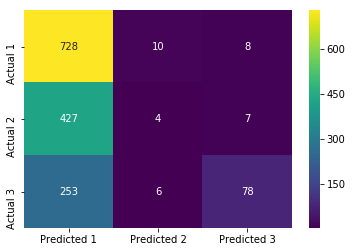

In [105]:
y_pred = pipeline0.predict(X_val)
plot_confusion_matrix(y_val, y_pred);

In [106]:
# Get precision & recall for majority class baseline
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.98      0.68       746
           2       0.20      0.01      0.02       438
           3       0.84      0.23      0.36       337

    accuracy                           0.53      1521
   macro avg       0.52      0.41      0.35      1521
weighted avg       0.50      0.53      0.42      1521



In [0]:
# Another way to get a classification report using an ROC_AUC approach (https://stackoverflow.com/questions/39685740/calculate-sklearn-roc-auc-score-for-multi-class?rq=1), 
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [108]:
# The above function provides the predicted values for each class. 
class_report(y_val, y_pred, y_score=None, average='micro')

,precision,recall,f1-score,support,pred
1,0.517045,0.975871,0.675952,746.0,1408.0
2,0.200000,0.009132,0.017467,438.0,20.0
3,0.838710,0.231454,0.362791,337.0,93.0
avg / total,0.497016,0.532544,0.416944,1521.0,1521.0


In [109]:
# Deriving an ROC curve for each class in cigarettes_per_day_bins
# Transform y_val and y_pred to arrays that are 1521 by 8 with bins as the columns

y_val_trans = pd.DataFrame(columns=['1','2','3'])
y_val_trans['1']=y_val.map(lambda x : 1 if x==1 else 0)
y_val_trans['2']=y_val.map(lambda x : 1 if x==2 else 0)
y_val_trans['3']=y_val.map(lambda x : 1 if x==3 else 0)
print ('y_val_trans =')
print (y_val_trans.head(), '\n')

y_pred_proba = model.predict_proba(X_val)

y_pred_trans = pd.DataFrame(y_pred_proba)

print ('y_pred_trans')
print (y_pred_trans.head(), '\n')

y_val_trans =
       1  2  3
31502  0  1  0
4439   1  0  0
27082  1  0  0
19317  1  0  0
2063   0  0  1 

y_pred_trans
          0         1         2
0  0.398415  0.327935  0.273650
1  0.525086  0.281100  0.193813
2  0.390653  0.346364  0.262983
3  0.212631  0.217438  0.569931
4  0.361398  0.387265  0.251337 



In [111]:
# Learn to predict each class against the other
print(__doc__)

import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val_trans.iloc[:, i], y_pred_trans.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_trans.values.ravel(), y_pred_trans.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


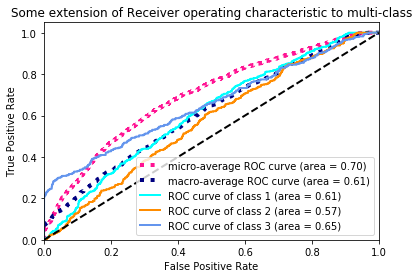

In [113]:
# Compute macro-average ROC curve and ROC area
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
n_classes = 3
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()